In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

import sys
import tqdm
from PIL import Image
import torch
import torchvision.transforms.v2 as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import seaborn as sns
import polars as pl
import plotly.express as px
import statsmodels as sm
import shap
import holoviews as hv
from holoviews import opts
import json

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sys.path.append('../')

In [2]:
tensor_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    #transforms.RandomHorizontalFlip(),
    #transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [16]:
augment_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.3, saturation=0.5, hue=0.2),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [17]:
img_path = "../../data/places/"
dataset = ImageFolder(
    root=img_path,
    transform=tensor_transform
)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

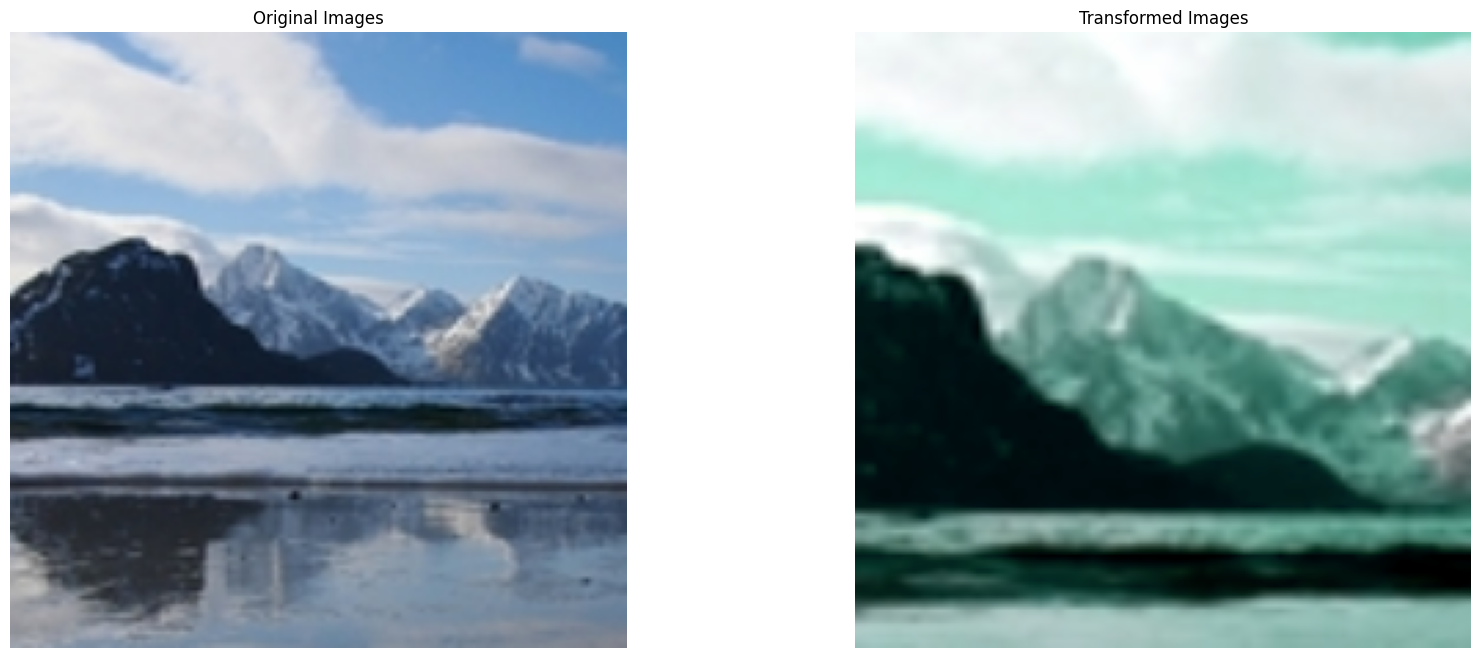

In [19]:
for inputs, labels in dataloader:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    classes = dataset.classes

    # Use torch's utility to create an image grid
    grid_img = make_grid(inputs[:1])  # Adjust to show a few images
    np_img = grid_img.numpy().transpose((1, 2, 0))  # Convert from CHW to HWC for matplotlib

    # Display the image grid without any denormalization
    axes[0].imshow(np_img)
    axes[0].axis('off')
    axes[0].set_title('Original Images')
    
    transformed_images = torch.stack([augment_transform(image) for image in inputs])  # Apply transformation manually
    transformed_grid = make_grid(transformed_images)  # Create a grid for transformed images
    np_transformed = transformed_grid.numpy().transpose((1, 2, 0))  # Convert from CHW to HWC for matplotlib

    axes[1].imshow(np_transformed)
    axes[1].axis('off')
    axes[1].set_title('Transformed Images')
    
    plt.show()  # Show the plot once
    break  # Stop after the first batch

